In [1]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

import datetime
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ryugn123/Desktop/Nasa Battery DataSet/BatteryAgingARC_5-18/B0005_charge.csv',encoding= 'CP949') 
df = np.round(df,3)
df

,Unnamed: 0,cycle,date_time,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,time
0,0,1,2008-04-02 13:08,3.873,-0.001,24.655,0.000,0.003,0.000
1,1,1,2008-04-02 13:08,3.479,-4.030,24.666,-4.036,1.570,2.532
2,2,1,2008-04-02 13:08,4.001,1.513,24.675,1.500,4.726,5.500
3,3,1,2008-04-02 13:08,4.012,1.509,24.694,1.500,4.742,8.344
4,4,1,2008-04-02 13:08,4.020,1.511,24.705,1.500,4.753,11.125
...,...,...,...,...,...,...,...,...,...
541168,541168,170,2008-05-28 11:09,0.236,-0.003,23.372,0.000,0.003,0.000
541169,541169,170,2008-05-28 11:09,0.003,-0.001,23.369,0.000,0.003,2.547
541170,541170,170,2008-05-28 11:09,4.985,0.001,23.387,0.000,5.002,5.500
541171,541171,170,2008-05-28 11:09,4.985,0.000,23.387,-0.002,5.002,8.312


In [3]:
# 전압이 4.2V에 도달하는 시점
data_vtime = []

for i in range(1, 169):
    data = df.loc[df['cycle'] == i]
    data = data[data.voltage_measured >= 4.2]
    a = data['time'].tolist()
    data_vtime.append(a[0])
    
data_vtime

[663.172,
 3241.797,
 3238.719,
 3229.203,
 3228.218,
 3229.438,
 3231.672,
 3231.531,
 3215.328,
 3210.297,
 3208.047,
 3211.157,
 2915.75,
 3184.64,
 3193.343,
 3195.625,
 3160.453,
 3162.968,
 3164.313,
 3161.391,
 3132.281,
 3299.735,
 3293.078,
 3262.141,
 3235.703,
 3226.922,
 3229.0,
 3193.797,
 3194.641,
 3195.984,
 3161.766,
 3173.625,
 0.0,
 3217.0,
 3180.968,
 3143.907,
 3112.188,
 3099.937,
 3085.407,
 3054.062,
 3029.156,
 2999.375,
 3003.828,
 2992.766,
 2973.906,
 2998.734,
 2967.766,
 2933.859,
 2903.125,
 2921.172,
 3147.157,
 3070.313,
 3013.703,
 2980.953,
 2940.281,
 2927.078,
 2903.203,
 2873.563,
 2842.218,
 2817.984,
 2812.578,
 2789.344,
 2769.656,
 2738.828,
 2700.75,
 2706.062,
 2689.203,
 2653.36,
 2633.406,
 2600.61,
 2585.297,
 2566.031,
 2546.359,
 2528.25,
 2497.61,
 2479.672,
 2458.656,
 2426.75,
 2406.078,
 2388.641,
 2424.531,
 2360.828,
 2327.297,
 2319.125,
 2327.359,
 2309.672,
 2285.468,
 2248.407,
 2224.422,
 2229.5,
 2214.422,
 2292.594,
 2351.51

In [4]:
# 전류가 1.5V 미만으로 떨어지는 시점
data_ctime = []

for i in range(1,  169):
    data = df.loc[df['cycle'] == i]
    data = data[data.time > 500]
    data = data[data.current_measured < 1.47]
    a = data['time'].tolist()
    data_ctime.append(a[0])
    
data_ctime

[728.078,
 3324.484,
 3321.344,
 3299.828,
 3298.718,
 3300.266,
 3314.282,
 3313.781,
 3285.484,
 3292.141,
 3278.031,
 3293.391,
 2985.547,
 3265.703,
 3263.234,
 3265.313,
 3241.016,
 3232.468,
 3245.719,
 3242.782,
 3212.422,
 3370.969,
 3376.625,
 3345.109,
 3318.016,
 3297.687,
 3300.312,
 3264.078,
 3264.657,
 3266.469,
 3243.203,
 3243.406,
 502.672,
 3268.875,
 3237.812,
 3203.516,
 3166.61,
 3156.906,
 3142.469,
 3111.297,
 3088.953,
 3056.532,
 3058.359,
 3052.625,
 3028.109,
 3055.656,
 3024.86,
 2993.656,
 2962.828,
 2975.594,
 3201.5,
 3127.235,
 3070.938,
 3038.171,
 2999.984,
 2986.984,
 2962.61,
 2933.297,
 2902.093,
 2883.265,
 2869.875,
 2851.89,
 2829.406,
 2801.422,
 2760.469,
 2768.468,
 2751.625,
 2713.0,
 2693.234,
 2660.407,
 2647.5,
 2628.453,
 2611.5,
 2590.781,
 2557.547,
 2545.016,
 2523.766,
 2486.532,
 2468.594,
 2451.266,
 2487.015,
 2425.765,
 2392.187,
 2378.828,
 2387.141,
 2366.766,
 2347.765,
 2310.703,
 2281.39,
 2289.031,
 2274.094,
 2349.641,
 24

In [5]:
#최고온도에 도달하는 시점
data_ttime = []

for i in range(1, 169):
    data = df.loc[df['cycle'] == i]
    data = data[data.time > 1000]
    data = data[data.time < 6000]
    Temp = data.loc[data['temperature_measured'].idxmax()]
    a = Temp['time']
    data_ttime.append(a)
    
data_ttime

[1006.094,
 3447.609,
 3419.156,
 3421.593,
 3395.125,
 3422.047,
 3437.266,
 3424.031,
 3393.734,
 3401.422,
 3411.234,
 3403.282,
 3099.391,
 3398.828,
 3396.968,
 3411.86,
 3349.078,
 3328.484,
 3366.875,
 3339.235,
 3319.828,
 3482.094,
 3463.781,
 3456.734,
 3403.907,
 3419.984,
 3397.906,
 3385.047,
 3385.969,
 3388.203,
 3363.313,
 3387.938,
 1004.344,
 3397.484,
 3380.937,
 3340.25,
 3322.547,
 3269.39,
 3297.922,
 3237.031,
 3260.812,
 3239.922,
 3201.421,
 3209.453,
 3198.719,
 3190.875,
 3164.203,
 3155.562,
 3133.14,
 3107.094,
 3320.735,
 3265.25,
 3211.609,
 3170.531,
 3168.906,
 3119.141,
 3131.375,
 3122.422,
 3089.828,
 3051.562,
 3048.937,
 3005.625,
 3033.984,
 3017.719,
 2913.172,
 2956.843,
 2947.297,
 2888.203,
 2888.953,
 2840.75,
 2848.219,
 2843.328,
 2817.906,
 2813.734,
 2759.953,
 2747.344,
 2759.922,
 2693.782,
 2684.344,
 2669.547,
 2671.781,
 2624.109,
 2612.781,
 2621.688,
 2607.172,
 2589.781,
 2587.656,
 2555.813,
 2522.5,
 2530.734,
 2512.547,
 2566.3

<AxesSubplot:>

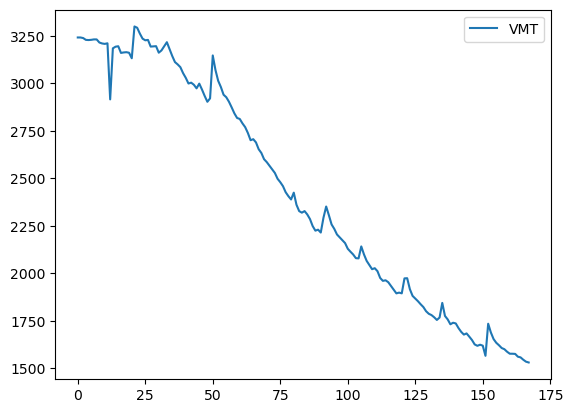

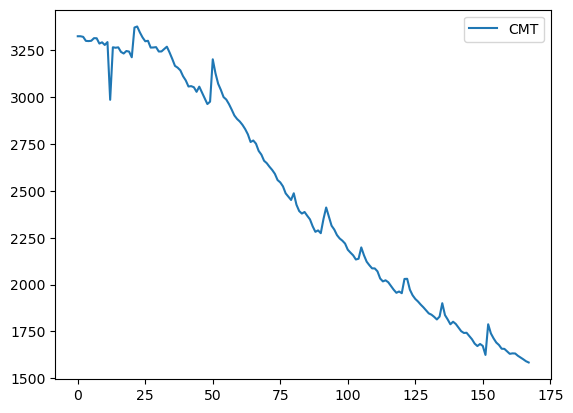

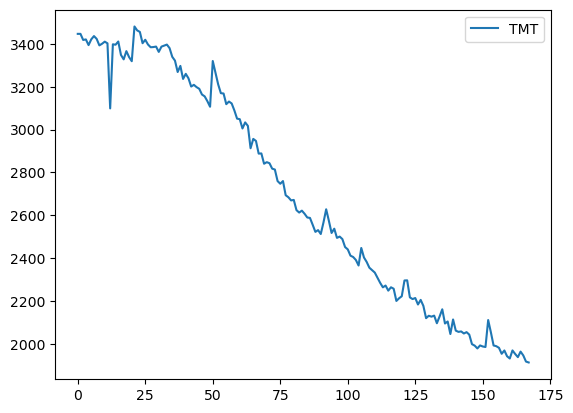

In [6]:
VMT = pd.DataFrame(data_vtime, columns=['VMT'])
CMT = pd.DataFrame(data_ctime, columns=['CMT'])
TMT = pd.DataFrame(data_ttime, columns=['TMT'])

VMT.loc[VMT['VMT'] <= data_vtime[167]-100, 'VMT'] = np.NaN
VMT = VMT.interpolate(limit_direction='backward')
VMT.plot()

CMT.loc[CMT['CMT'] <= data_ctime[167]-100, 'CMT'] = np.NaN
CMT = CMT.interpolate(limit_direction='backward')
CMT.plot()

TMT.loc[TMT['TMT'] <= data_ttime[167]-100, 'TMT'] = np.NaN
TMT.loc[TMT['TMT'] >= data_ttime[1]+50, 'TMT'] = np.NaN
TMT = TMT.interpolate(limit_direction='backward')
TMT.plot()


In [7]:
time_data = pd.concat([VMT, CMT, TMT], axis=1)

In [8]:
time_data

,VMT,CMT,TMT
0,3241.797,3324.484,3447.609
1,3241.797,3324.484,3447.609
2,3238.719,3321.344,3419.156
3,3229.203,3299.828,3421.593
4,3228.218,3298.718,3395.125
...,...,...,...
163,1560.609,1620.328,1937.375
164,1556.907,1611.204,1963.141
165,1544.562,1601.547,1945.328
166,1534.344,1591.234,1916.609


In [9]:
#capacity 용량은 방전 데이터에만 있으므로 추출 후 합쳐준다.
dff = pd.read_csv('C:/Users/ryugn123/Desktop/Nasa Battery DataSet/BatteryAgingARC_5-18/B0005_discharge.csv',encoding= 'CP949') 
dff

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,date,capacity
0,1,24,2008-04-02 15:25,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,2008-04-02 15:25,1.856487
1,1,24,2008-04-02 15:25,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,2008-04-02 15:25,1.856487
2,1,24,2008-04-02 15:25,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,2008-04-02 15:25,1.856487
3,1,24,2008-04-02 15:25,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,2008-04-02 15:25,1.856487
4,1,24,2008-04-02 15:25,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,2008-04-02 15:26,1.856487
...,...,...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,2008-05-27 21:31,1.325079
50281,168,24,2008-05-27 20:45,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,2008-05-27 21:31,1.325079
50282,168,24,2008-05-27 20:45,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,2008-05-27 21:31,1.325079
50283,168,24,2008-05-27 20:45,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,2008-05-27 21:31,1.325079


In [10]:
dff.loc[:]['capacity']

0        1.856487
1        1.856487
2        1.856487
3        1.856487
4        1.856487
           ...   
50280    1.325079
50281    1.325079
50282    1.325079
50283    1.325079
50284    1.325079
Name: capacity, Length: 50285, dtype: float64

In [11]:
capacity = []

for i in range(1, 169):
    data = dff.loc[dff['cycle'] == i]
    a = data['capacity'].tolist()
    capacity.append(a[0])

len(capacity)

168

In [12]:
SOH = []
for i in range(len(capacity)):
    a = (capacity[i]/2)*100
    SOH.append(a)
    
SOH

[92.82437105,
 92.31636250000001,
 91.7674597,
 91.76312639999999,
 91.73227539999999,
 91.783083,
 91.75730715,
 91.28783955,
 91.23869264999999,
 91.2306634,
 91.23097765,
 90.7100968,
 90.6876079,
 90.67202455,
 90.12990020000001,
 90.105345,
 90.12897505000001,
 90.1534157,
 90.13888125,
 92.35129975000001,
 92.37086555,
 91.80887105,
 91.2890374,
 91.2556822,
 91.27907520000001,
 90.7015564,
 90.73845969999999,
 90.69846944999999,
 90.13828325,
 90.203852,
 92.5901276,
 91.5351923,
 90.99520545,
 90.4653982,
 90.23049525,
 89.96885325000001,
 89.4221617,
 89.1461524,
 88.6516858,
 88.65188775,
 88.39360555,
 88.11575350000001,
 88.3808646,
 88.13341799999999,
 87.58652434999999,
 87.09248025000001,
 86.80456755,
 89.68120075,
 89.1594511,
 88.36821040000001,
 87.85088925,
 87.3435309,
 87.08586255,
 86.8211253,
 86.3160862,
 85.79032695,
 85.52666755,
 85.300725,
 85.01555135,
 84.728993,
 84.24514545000001,
 83.72370795,
 83.7284624,
 83.18581879999999,
 82.95069345,
 82.69270285

In [13]:
SOH = pd.DataFrame(SOH, columns=['SOH'])
SOH

,SOH
0,92.824371
1,92.316363
2,91.767460
3,91.763126
4,91.732275
...,...
163,64.673181
164,64.400170
165,64.372626
166,65.450768


In [14]:
capacity = pd.DataFrame(capacity, columns=['capacity'])
capacity


,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [15]:
time_data = pd.concat([time_data, capacity], axis=1)

In [16]:
time_data = pd.concat([time_data, SOH], axis=1)

In [17]:
time_data

,VMT,CMT,TMT,capacity,SOH
0,3241.797,3324.484,3447.609,1.856487,92.824371
1,3241.797,3324.484,3447.609,1.846327,92.316363
2,3238.719,3321.344,3419.156,1.835349,91.767460
3,3229.203,3299.828,3421.593,1.835263,91.763126
4,3228.218,3298.718,3395.125,1.834646,91.732275
...,...,...,...,...,...
163,1560.609,1620.328,1937.375,1.293464,64.673181
164,1556.907,1611.204,1963.141,1.288003,64.400170
165,1544.562,1601.547,1945.328,1.287453,64.372626
166,1534.344,1591.234,1916.609,1.309015,65.450768


In [18]:
time_data.to_csv("C:/Users/ryugn123/Desktop/B0005_time.csv")